In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/shivendutyagi/Datasets/main/mushrooms.csv')

In [ ]:
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
for column in df.columns:
  print('Unique values in',column+':',
        df[column].unique())

Unique values in class: ['p' 'e']
Unique values in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap-surface: ['s' 'y' 'f' 'g']
Unique values in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill-attachment: ['f' 'a']
Unique values in gill-spacing: ['c' 'w']
Unique values in gill-size: ['n' 'b']
Unique values in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk-shape: ['e' 't']
Unique values in stalk-root: ['e' 'c' 'b' 'r' '?']
Unique values in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil-type: ['p']
Unique values in veil-color: ['w' 'n' 'o' 'y']
Unique values in ring-number: ['o' 't' 'n']

In [ ]:
y=df['class']

In [ ]:
y[y=='p']=1
y[y=='e']=0
y=y.astype(np.uint8)

In [ ]:
X=df.drop(['class'],axis=1)
X_encoded=pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_encoded,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
dt=classifier.fit(Xtrain,ytrain)

In [ ]:
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


[Text(525.1764705882352, 407.7, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]\nclass = Edible'),
 Text(315.1058823529412, 353.34000000000003, 'stalk-root_c <= 0.5\ngini = 0.28\nsamples = 3191\nvalue = [537, 2654]\nclass = Poisonous'),
 Text(210.0705882352941, 298.98, 'stalk-root_r <= 0.5\ngini = 0.122\nsamples = 2809\nvalue = [184, 2625]\nclass = Poisonous'),
 Text(157.5529411764706, 244.62, 'odor_a <= 0.5\ngini = 0.044\nsamples = 2685\nvalue = [60, 2625]\nclass = Poisonous'),
 Text(105.03529411764706, 190.26, 'odor_l <= 0.5\ngini = 0.022\nsamples = 2654\nvalue = [29, 2625]\nclass = Poisonous'),
 Text(52.51764705882353, 135.89999999999998, 'gini = 0.0\nsamples = 2625\nvalue = [0, 2625]\nclass = Poisonous'),
 Text(157.5529411764706, 135.89999999999998, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = Edible'),
 Text(210.0705882352941, 190.26, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]\nclass = Edible'),
 Text(262.5882352941176, 244.62, 'gini = 0.0\nsamples = 124\

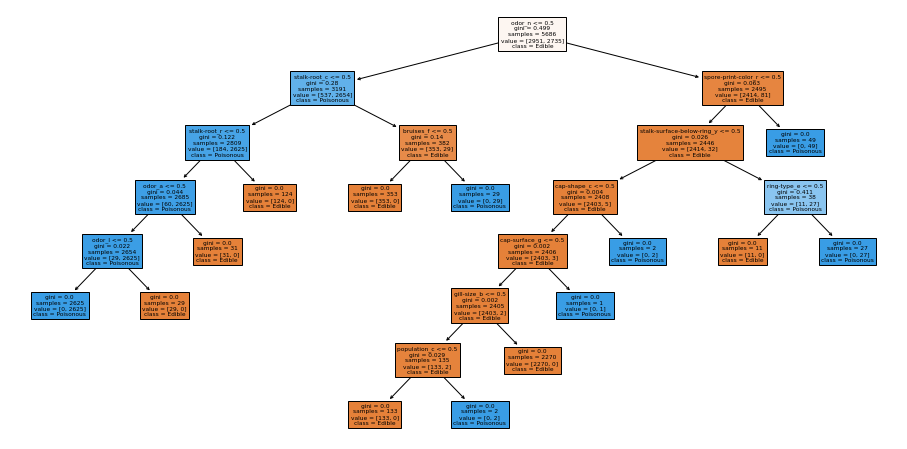

In [ ]:
plt.figure(figsize=(16,8))
plot_tree(dt,filled=True,class_names=['Edible','Poisonous'],feature_names=X_encoded.columns);

In [ ]:
score=cross_val_score(dt,Xtrain,ytrain,cv=5)
for scores in score:
  print('Accuracy:',round(scores,4))

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9982


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


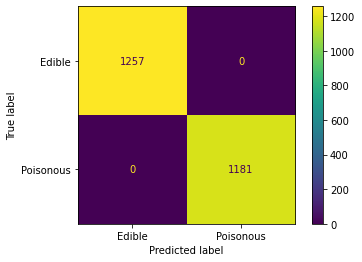

In [ ]:
plot_confusion_matrix(dt,Xtest,ytest,display_labels=['Edible','Poisonous']);